#Installing RDKit
here ! before pip is used as we work in colab

In [1]:
!pip install rdkit

#Installing Panda, Matploit, Seaborn Library



1.   Pandas	Works with tables and data frames
2.   Matplotlib	basic plotting and graphing library
3.   Seaborn for beautiful heatmaps and statistical visualizations









In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


1. Chem loads molecules from SMILES strings.
2. Draw visualizes molecular structures.
3. AllChem gives access to fingerprint calculations.
4. DataStructs provides similarity computation tools.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import Draw, AllChem, DataStructs

# Data Frame
Smiles convert to Molecule object (As computer doesn't understand smiles, we need to to convert it into Molecule object, Mol)
This Mol is very important, later it'll be used for Draw molecule, Fingerprint, Similarity, Heatmap etc




SMILES → Mol → Fingerprint → Similarity

In [4]:
import pandas as pd
from rdkit import Chem

data = pd.DataFrame({
    "Molecule Name": ["Aspirin", "Paracetamol", "Ibuprofen", "Caffeine", "Metformin"],
    "SMILES": [
        "CC(=O)OC1=CC=CC=C1C(=O)O",          # Aspirin
        "CC(=O)NC1=CC=C(O)C=C1",              # Paracetamol
        "CC(C)CC1=CC=C(C=C1)C(C)C(=O)O",      # Ibuprofen
        "Cn1cnc2c1c(=O)n(C)c(=O)n2C",         # Caffeine
        "CNC(N)=NCCC(=O)N"                    # Metformin
    ]
})

# SMILES → Mol
data["Mol"] = data["SMILES"].apply(Chem.MolFromSmiles)

data

#Aspirin (molecule name) → CC(=O)OC1=CC=CC=C1C(=O)O (smiles)
#the SMILES column contains the structural information that RDKit uses to: build the molecule, calculate fingerprints, and draw the chemical image
#Each SMILES string uniquely describes how atoms are connected.

,Molecule Name,SMILES,Mol
0,Aspirin,CC(=O)OC1=CC=CC=C1C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7d80e0174660>
1,Paracetamol,CC(=O)NC1=CC=C(O)C=C1,<rdkit.Chem.rdchem.Mol object at 0x7d80e01743c0>
2,Ibuprofen,CC(C)CC1=CC=C(C=C1)C(C)C(=O)O,<rdkit.Chem.rdchem.Mol object at 0x7d80e0174430>
3,Caffeine,Cn1cnc2c1c(=O)n(C)c(=O)n2C,<rdkit.Chem.rdchem.Mol object at 0x7d80e0174580>
4,Metformin,CNC(N)=NCCC(=O)N,<rdkit.Chem.rdchem.Mol object at 0x7d80e01745f0>


# Draw Molecule


1.   if any mol remain unconverted from smiles, or MolFromSmiles → None , then it'll be ignored to tackle any error
2.   (cols × cell → total width), (rows × cell → total height)
3. MolDraw2DSVG(total_width, total_height, cell_width, cell_height)


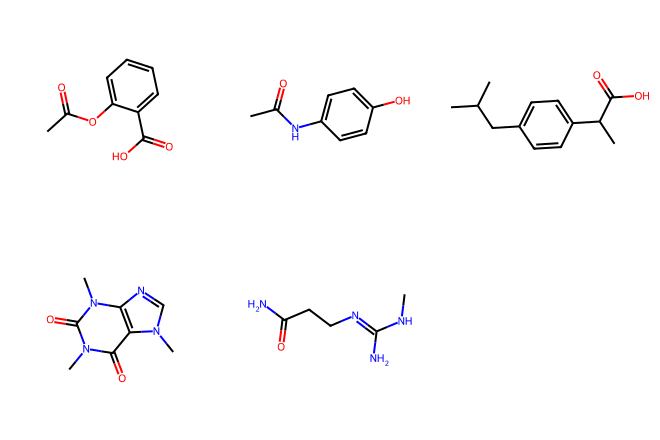

In [5]:
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG, display
import math

def show_grid(mols, cols=3, cell=220):
    mols = [m for m in mols if m is not None]

    rows = math.ceil(len(mols)/cols)    #no of rows

    drawer = rdMolDraw2D.MolDraw2DSVG(cols*cell, rows*cell, cell, cell)

    drawer.DrawMolecules(mols)

    drawer.FinishDrawing()

    display(SVG(drawer.GetDrawingText()))


mols = data["Mol"].tolist()
show_grid(mols, cols=3, cell=220)   #function calling


In [6]:
names = data["Molecule Name"].tolist()
mols = data["Mol"].tolist()


# Tanimoto Similarity


*   Structural Similaarity between two molecules
Formula: (A∪B) / (A∩B)​

*   Value Range from 0 to 1
  (O --- No similarity)
  (1 --- Fully Identical)

*    Fingerprint used to get Tanimoto Similarity


*   High Overlap -- High Similarity


Fingerprint is the structural Digital representation of molecule



In [7]:
from rdkit.Chem import AllChem, DataStructs
import numpy as np

def tanimoto(m1, m2):
    fp1 = AllChem.GetMorganFingerprintAsBitVect(m1, 2, nBits=2048)  #Mol to Fingerprint.  #radius of Fingerprint-- 2
    fp2 = AllChem.GetMorganFingerprintAsBitVect(m2, 2, nBits=2048)  #nBits=2048, Fingerprint'll be 2048-bit binary vector
    return DataStructs.TanimotoSimilarity(fp1, fp2)


# Similarity Matrix

In [8]:

n = len(mols)
sim = np.zeros((n, n), dtype=float)      # n*n zero matrix with floating data

for i in range(n):
    for j in range(n):
        sim[i, j] = tanimoto(mols[i], mols[j])    #calculate similarity

sim


[16:21:02] DEPRECATION WARNING: please use MorganGenerator
[16:21:02] DEPRECATION WARNING: please use MorganGenerator
[16:21:02] DEPRECATION WARNING: please use MorganGenerator
[16:21:02] DEPRECATION WARNING: please use MorganGenerator
[16:21:02] DEPRECATION WARNING: please use MorganGenerator
[16:21:02] DEPRECATION WARNING: please use MorganGenerator
[16:21:02] DEPRECATION WARNING: please use MorganGenerator
[16:21:02] DEPRECATION WARNING: please use MorganGenerator
[16:21:02] DEPRECATION WARNING: please use MorganGenerator
[16:21:02] DEPRECATION WARNING: please use MorganGenerator
[16:21:02] DEPRECATION WARNING: please use MorganGenerator
[16:21:02] DEPRECATION WARNING: please use MorganGenerator
[16:21:02] DEPRECATION WARNING: please use MorganGenerator
[16:21:02] DEPRECATION WARNING: please use MorganGenerator
[16:21:02] DEPRECATION WARNING: please use MorganGenerator
[16:21:02] DEPRECATION WARNING: please use MorganGenerator
[16:21:02] DEPRECATION WARNING: please use MorganGenerat

array([[1.        , 0.22222222, 0.19512195, 0.08888889, 0.0952381 ],
       [0.22222222, 1.        , 0.18421053, 0.09756098, 0.13513514],
       [0.19512195, 0.18421053, 1.        , 0.08695652, 0.11904762],
       [0.08888889, 0.09756098, 0.08695652, 1.        , 0.04444444],
       [0.0952381 , 0.13513514, 0.11904762, 0.04444444, 1.        ]])

# Visualization of Tanimoto in Heatmap

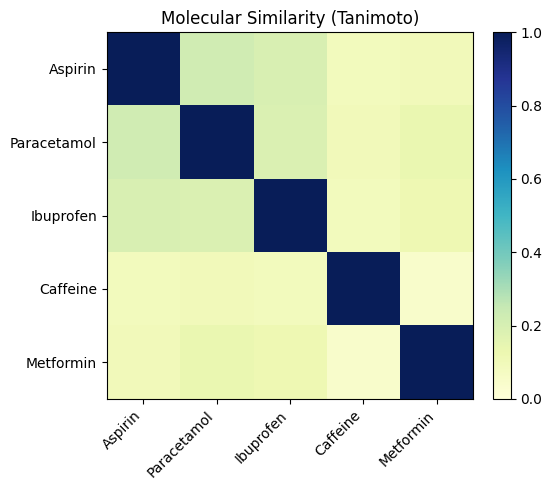

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))   #Heatmap campus, width = 6 inches, height = 5 inches

im = plt.imshow(sim, vmin=0, vmax=1, cmap="YlGnBu") #sim converted to image, max colr:1, min colr:0, color map (colr palate): Y G B

plt.colorbar(im, fraction=0.046, pad=0.04)   #fraction, pad --- spacing purpose

plt.xticks(range(n), names, rotation=45, ha="right")

plt.yticks(range(n), names)

plt.title("Molecular Similarity (Tanimoto)")

plt.tight_layout()
plt.show()



# Save CSV File, Similarity Pair Score of Molecule



In [10]:
import pandas as pd

df = pd.DataFrame(sim, index=names, columns=names)   #Table creation:similarity matrix (NxN),row labels = molecule names,column labels = molecule names
print(df.head())
df.to_csv("drug_similarity.csv")                    #CSV file save

print("File saved: drug_similarity.csv")            #CSV file print/show


# Top similar pairs
pairs = []
for i in range(n):
    for j in range(i+1, n):
        pairs.append((names[i], names[j], sim[i, j]))

pairs.sort(key=lambda x: x[2], reverse=True)    #x[0] → 1st molecule,x[1] → 2nd molecule,x[2] → similarity score

print("Top similar molecule pairs:")
for a, b, score in pairs[:5]:
    print(f"{a:15s} — {b:15s} : {score:.2f}")



              Aspirin  Paracetamol  Ibuprofen  Caffeine  Metformin
Aspirin      1.000000     0.222222   0.195122  0.088889   0.095238
Paracetamol  0.222222     1.000000   0.184211  0.097561   0.135135
Ibuprofen    0.195122     0.184211   1.000000  0.086957   0.119048
Caffeine     0.088889     0.097561   0.086957  1.000000   0.044444
Metformin    0.095238     0.135135   0.119048  0.044444   1.000000
File saved: drug_similarity.csv
Top similar molecule pairs:
Aspirin         — Paracetamol     : 0.22
Aspirin         — Ibuprofen       : 0.20
Paracetamol     — Ibuprofen       : 0.18
Paracetamol     — Metformin       : 0.14
Ibuprofen       — Metformin       : 0.12
